In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re
from wordcloud import WordCloud


In [106]:
df = pd.read_csv('labeled_chat_messages.csv')

In [107]:
df.head()

,time,user_name,user_color,message,sentiment
0,25,onk206,#0000FF,agahi on time,label_1
1,25,keiranm5,#0077FF,agahi,label_2
2,25,le_mon_key,#5F9EA0,LOL WE ARE SO BACK,label_2
3,25,12487,#008000,PagChomp,label_1
4,25,wicked_tf,#FFFCE4,PogU LIVE,label_1


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124385 entries, 0 to 124384
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time        124385 non-null  int64 
 1   user_name   124385 non-null  object
 2   user_color  112918 non-null  object
 3   message     124383 non-null  object
 4   sentiment   124385 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [109]:
df.describe()

,time
count,124385.000000
mean,7802.247120
std,4410.178351
min,25.000000
25%,3944.000000
50%,7632.000000
75%,11711.000000
max,15444.000000


In [110]:
df['message'].value_counts().head(25)

message
LOL         4560
Aware       2344
Cinema      2021
HUH         1678
o7          1653
MONKA       1300
omE         1007
EZ           875
SCHIZO       809
Cooked       770
GYATT        707
OOOO         700
mhm          628
NAHH         573
D:           562
no           541
GIGACHAD     515
BAND         510
hesRight     491
Classic      486
OMEGALUL     442
yes          417
Dentge       407
WutFace      378
TWEAK        371
Name: count, dtype: int64

In [111]:
df['message'].value_counts().iloc[250:275]

message
OMG                                                                                                                                                                                                                                       34
omeDamn                                                                                                                                                                                                                                   34
PepeHands                                                                                                                                                                                                                                 34
Dumbass                                                                                                                                                                                                                                   34
mmmmmm                                      

In [112]:

# Define the message groups
positive_messages = [
    'LOL', 'lol', 'Lol', 'Cinema', 'HUH', 'o7', 'MONKA', 'omE', 'EZ', 'SCHIZO', 
    'Cooked', 'GYATT', 'OOOO', 'mhm', 'NAHH', 'D:', 'no', 'GIGACHAD', 
    'BAND', 'hesRight', 'Classic', 'OMEGALUL', 'yes', 'Aware', 'AURA', 'SAJ',
    'Listening', 'xQxi', 'Banger', 'Happi', 'LULW', 'monkaW', 'agahi', 'meow', 'LUL', 'autism',
    'WW', 'SpeedLaugh', '00', 'Gayge', 'T', 'Clap', 'WTF', 'YES', 'FACE SCAN', 
    'druskiDance', 'renxPOPCORN', 'Dance', 'Pog', 'WAYTOODANK', 'nyanPls', 
    'SOYSCREAM', 'EARTHQUAKE', 'TrollDespair', 'ThatsEnough', 
    'ome44butthenameislongersoyoucantspamit', 'MAXWIN', 'FeelsStrongMan', 'NAILS',
    'Pepega', 'AYOO', 'xqcGoon', 'BOOBA', 'Nerd', 'Loading', 'MEGALUL', 'MONKA 󠀀', 
    'xqcLL', 'RIPBOZO', 'muniOMEGALUL', 'Uware', 'PagMan', 'LMAO',
    'Ogre', 'AYAYA', 'TrollAware', 'ome32', 'Stare', 'THIS', '1', 'LOL LOL','YEP','HOLY','SoCute','LETHIMCOOK','VeryPog','PogU','EZ Clap','TRUE','GG','LMFAOO','EZ'
]


negative_messages = ['U','YOU','Copege','ADHD','L','Skip','CAUGHT','uuh','Mutted',
                     'Clueless','Pointless','Dumb','Stupid','retarded','idiot','so bad','Delusional','eww','u','No','NO','NOO','SERIOUSLY','U LOL','forsenCD','bro','WeirdChamp','what','#ad','fucking','fuck you']

df.loc[df['message'].str.contains('\?+', regex=True, na=False), 'sentiment'] = 'label_0'

df.loc[df['message'].str.fullmatch(r'(ah|ha)+', na=False), 'sentiment'] = 'label_2'

# Update sentiment labels
for message in positive_messages:
    df.loc[df['message'] == message, 'sentiment'] = 'label_2'

for message in negative_messages:
    df.loc[df['message'] == message, 'sentiment'] = 'label_0'



In [113]:
df.to_csv('labeled_chat_messages.csv', index=False)

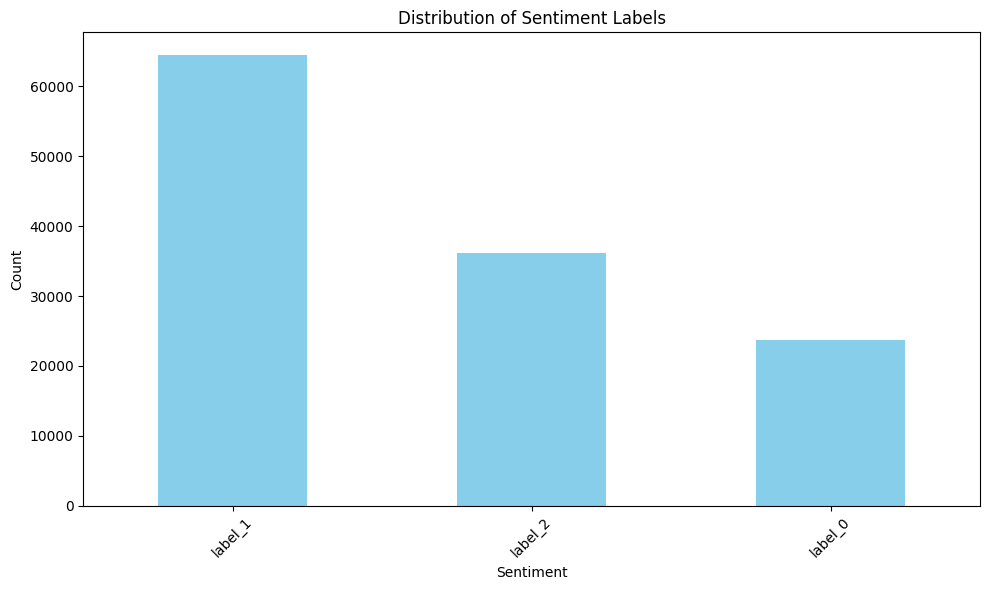

In [85]:
# 1. Sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

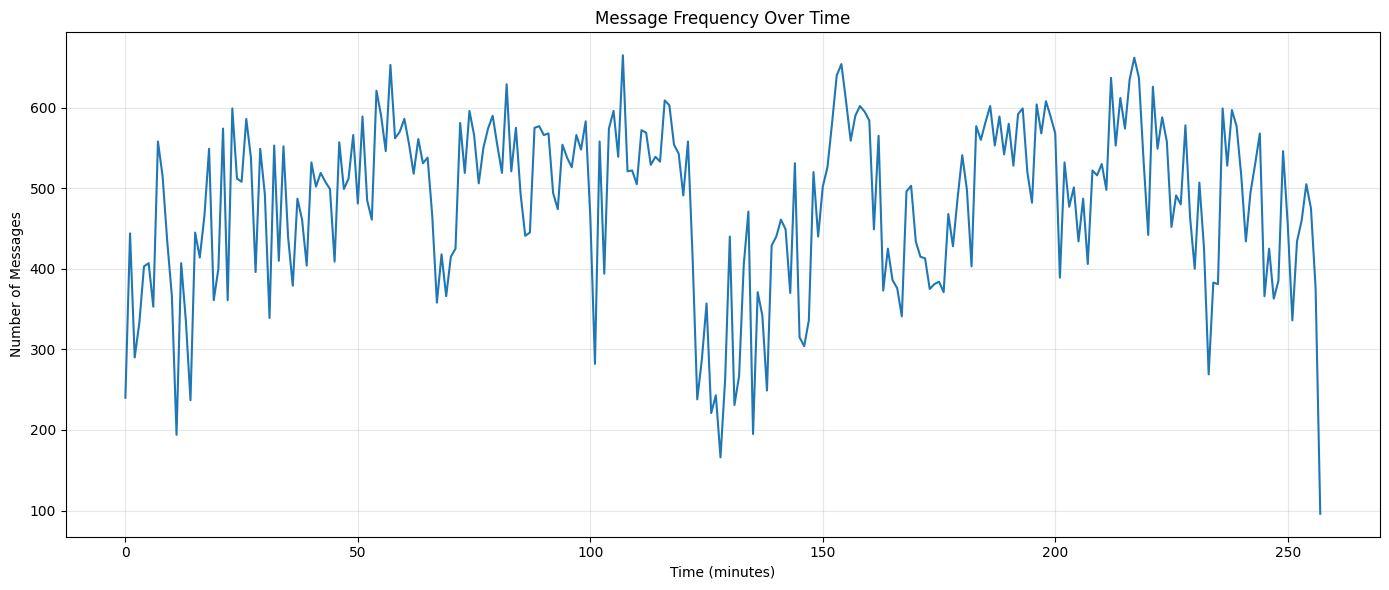

In [86]:
# 2. Message frequency over time
# Convert time to minutes for better visualization
df['minute'] = df['time'] // 60
message_frequency = df.groupby('minute').size()

plt.figure(figsize=(14, 6))
plt.plot(message_frequency.index, message_frequency.values)
plt.title('Message Frequency Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Messages')
plt.grid(True, alpha=0.3)
plt.tight_layout()

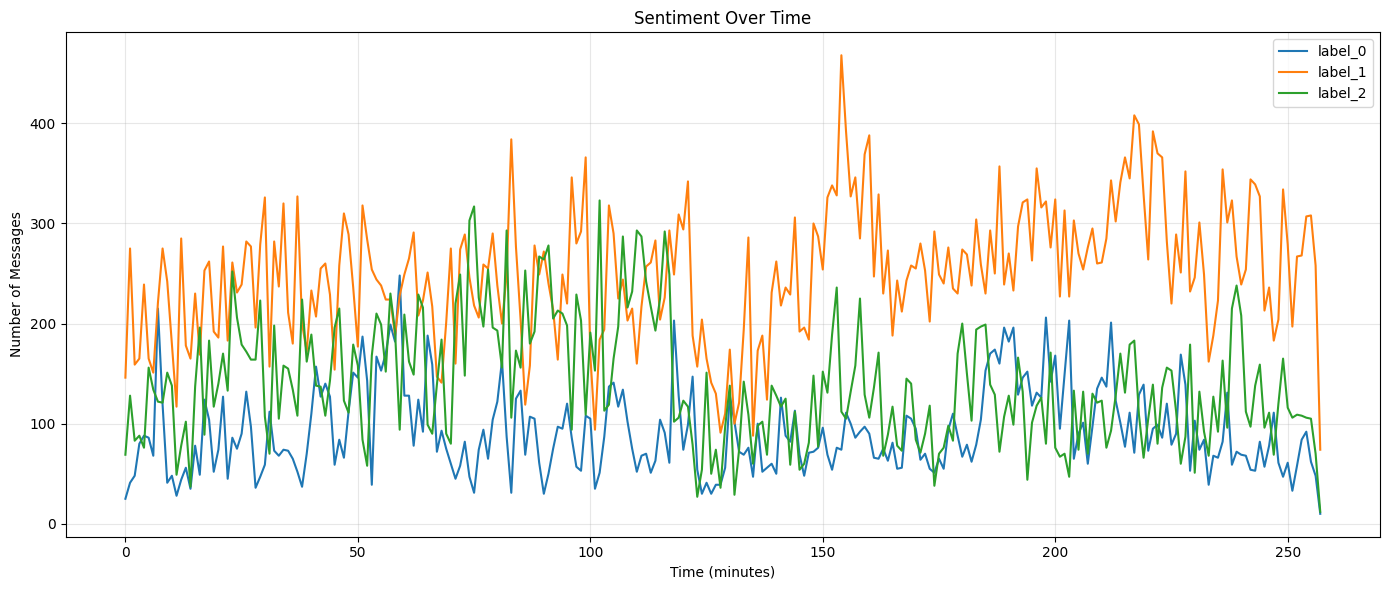

In [87]:
# 3. Sentiment over time
sentiment_time = df.groupby(['minute', 'sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(14, 6))
for col in sentiment_time.columns:
    plt.plot(sentiment_time.index, sentiment_time[col], label=col)
plt.title('Sentiment Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Messages')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

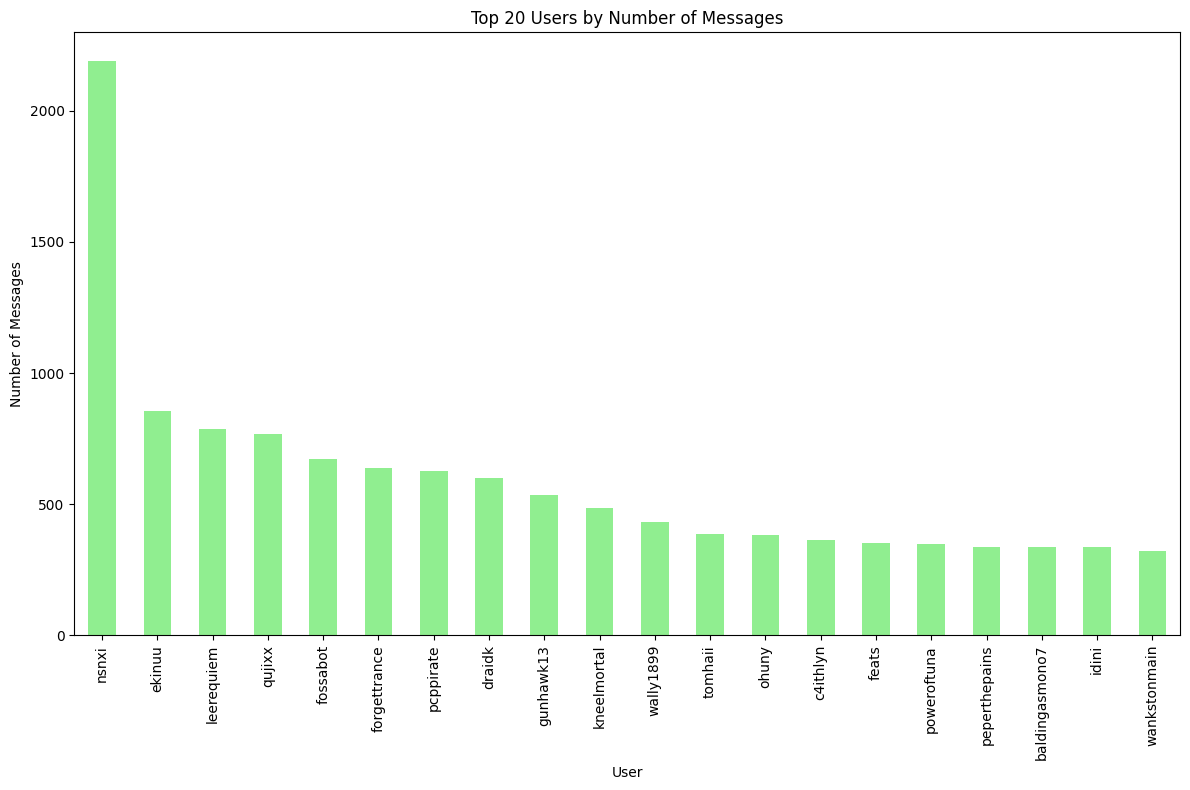

In [88]:
top_users = df['user_name'].value_counts().head(20)

plt.figure(figsize=(12, 8))
top_users.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Users by Number of Messages')
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.xticks(rotation=90)
plt.tight_layout()

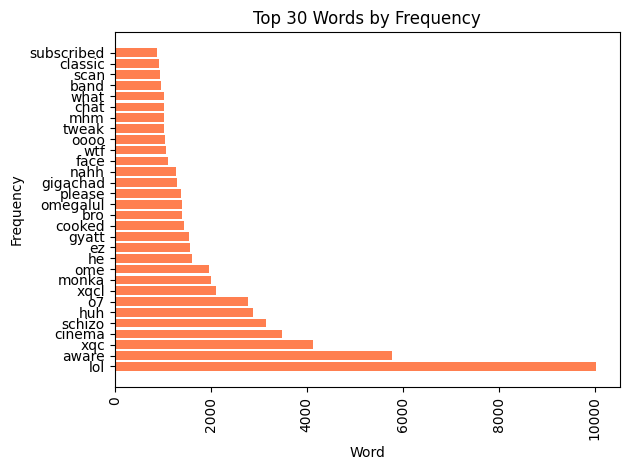

In [89]:
# 5. Word frequency analysis (excluding stopwords)
def process_text(text):
    if pd.isna(text):
        return []
    # Convert to lowercase, remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Split into words
    words = text.split()
    # Remove stopwords (customize as needed)
    stopwords = {'a', 'an', 'the', 'and', 'or','it','its','do','you','this','like','that','but', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
                'in', 'on', 'at', 'to', 'for', 'with', 'by', 'about', 'against', 'between', 'into', 'through',
                'during', 'before', 'after', 'above', 'below', 'from', 'up', 'down', 'of', 'off', 'over',
                'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
                'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
                'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
                'don', "don't", 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',
                "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
                'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
                'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
    return [w for w in words if w not in stopwords and len(w) > 1]

# Collect all words
all_words = []
for msg in df['message'].dropna():
    all_words.extend(process_text(msg))

# Count frequency
word_counts = Counter(all_words)
top_words = word_counts.most_common(30)

words, counts = zip(*top_words)
plt.barh(words, counts, color='coral')
plt.title('Top 30 Words by Frequency')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

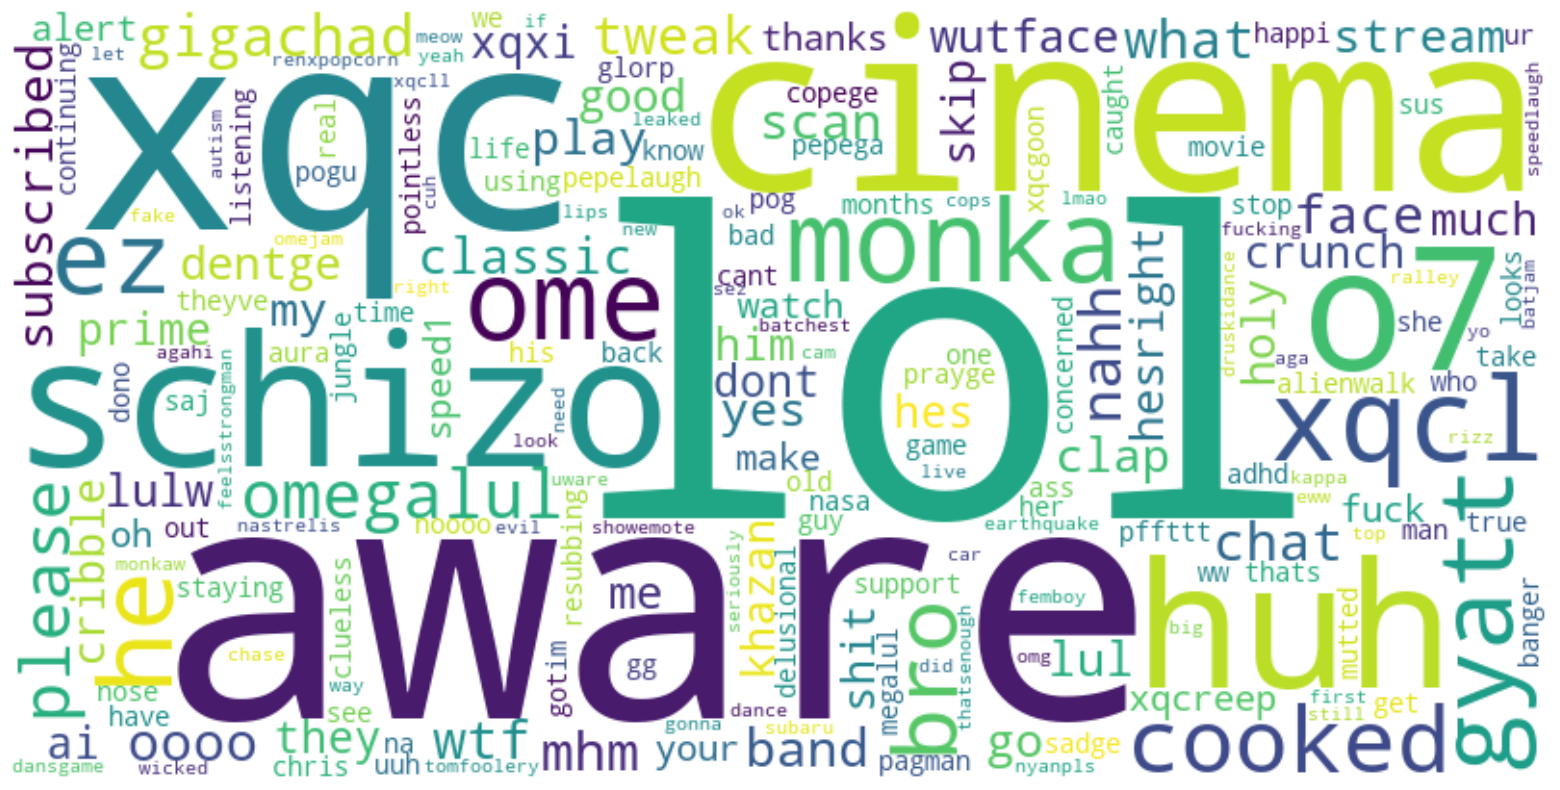

In [90]:
# 6. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

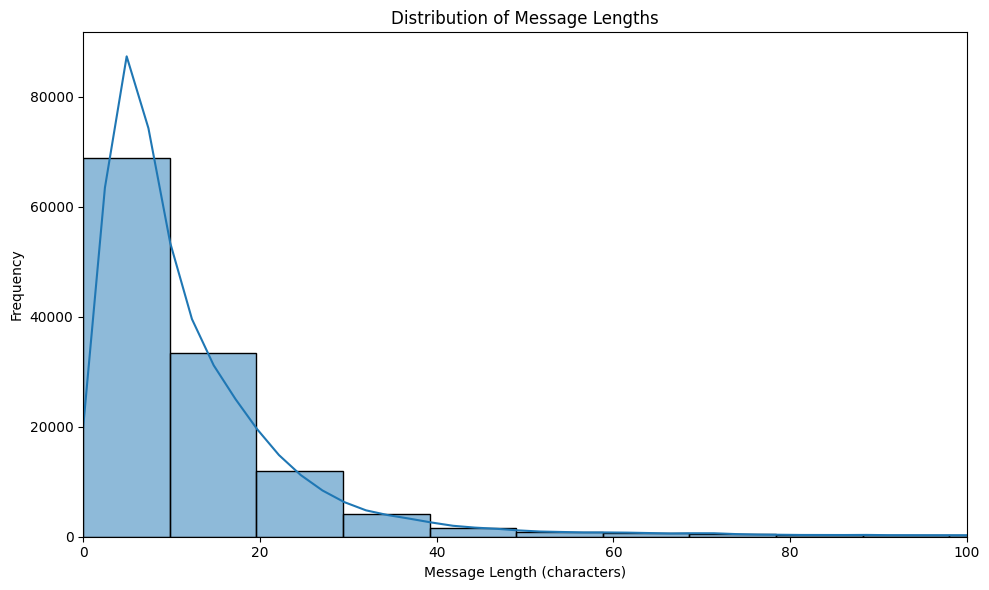

In [91]:
df['message_length'] = df['message'].fillna('').apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Adjust limit as needed
plt.tight_layout()

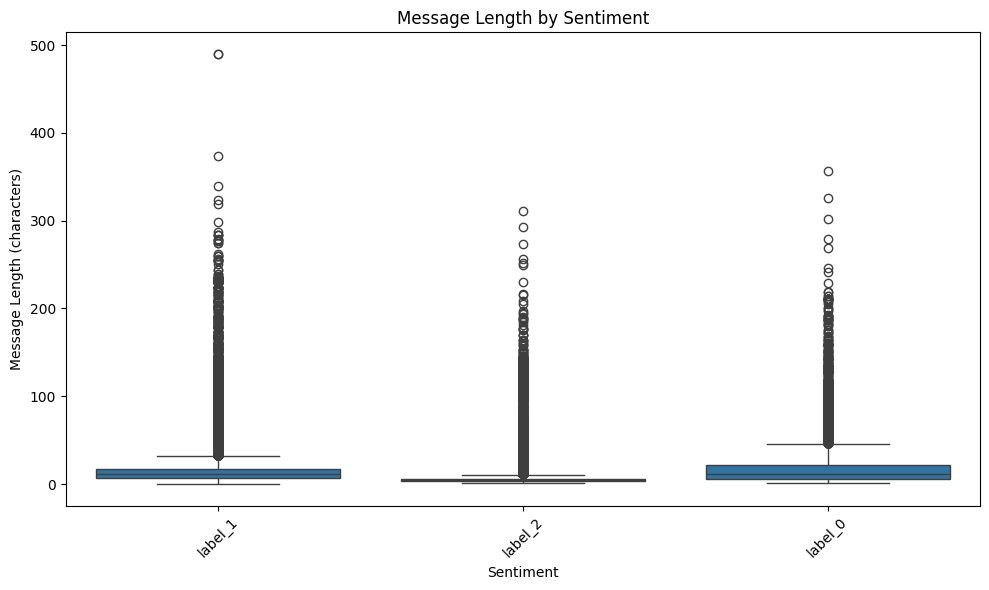

In [92]:
# 8. Correlation between message length and sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='message_length', data=df)
plt.title('Message Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Message Length (characters)')
plt.xticks(rotation=45)
plt.tight_layout()

In [93]:
# 9. Create custom sentiment lexicon based on frequency
# Find words that appear most frequently in each sentiment category
sentiment_words = {}
for sentiment in df['sentiment'].unique():
    # Get all messages with this sentiment
    sentiment_msgs = df[df['sentiment'] == sentiment]['message'].dropna()
    # Process text
    words = []
    for msg in sentiment_msgs:
        words.extend(process_text(msg))
    # Count word frequencies
    word_freq = Counter(words)
    # Get top words for this sentiment
    sentiment_words[sentiment] = word_freq.most_common(7)

# Display top words for each sentiment
for sentiment, words in sentiment_words.items():
    print(f"Top words for {sentiment}:")
    for word, count in words:
        print(f"  {word}: {count}")

Top words for label_1:
  lol: 3570
  xqc: 3162
  aware: 2841
  schizo: 2126
  cinema: 1305
  please: 1104
  o7: 996
Top words for label_2:
  lol: 5701
  aware: 2418
  cinema: 2102
  xqcl: 1913
  huh: 1709
  o7: 1658
  monka: 1394
Top words for label_0:
  wtf: 861
  lol: 758
  xqc: 717
  he: 644
  fuck: 585
  shit: 574
  what: 559
